In [37]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn import datasets    # import our handwriting dataset
from sklearn.neighbors import KNeighborsClassifier

In [38]:
mnist = datasets.fetch_openml('mnist_784')

In [39]:
X = mnist.data[:30000]
print(X.shape)
y = mnist.target[:30000]
print(y.shape)

(30000, 784)
(30000,)


In [51]:
mnist.data[0] # view array of first image, each number represents intensity
# print(mnist.data[0].shape)

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

Text(0.5, 1.0, 'Number 5')

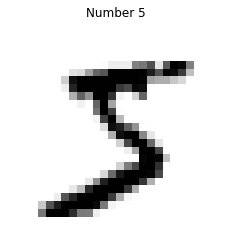

In [41]:
# plot sample array

n = 0
sample = mnist.data[n]
plt.imshow(np.reshape(sample, (28,28)), cmap = plt.cm.gray_r)
plt.axis('off')
plt.title('Number ' + str(y[n]))

In [42]:
# split data into training and testing

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=99, stratify=y)

In [43]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
# X_train = X_train[:10000]
# X_test = X_test[:10000]
# y_train = y_train[:10000]
# y_test  = y_test[:10000]
# print(X_train.shape)
# print(X_test.shape)
# print(y_train.shape)
# print(y_test.shape)

(20100, 784)
(9900, 784)
(20100,)
(9900,)


In [44]:
# fit model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [45]:
# predict from test dataset

y_pred = knn.predict(X_test)
y_pred

array(['1', '5', '7', ..., '1', '4', '0'], dtype=object)

In [46]:
# check accuracy

from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       977
           1       0.95      0.99      0.97      1130
           2       0.98      0.95      0.96       973
           3       0.95      0.96      0.95      1014
           4       0.97      0.95      0.96       965
           5       0.96      0.96      0.96       894
           6       0.98      0.98      0.98       982
           7       0.96      0.96      0.96      1025
           8       0.98      0.90      0.94       949
           9       0.94      0.96      0.95       991

    accuracy                           0.96      9900
   macro avg       0.96      0.96      0.96      9900
weighted avg       0.96      0.96      0.96      9900



In [47]:
from sklearn import metrics
acc = metrics.balanced_accuracy_score(y_test, y_pred)   # we use balanced accuracy here instead of just accuracy because we want a better measure-- assume number of samples for each target is the same
print('accuracy: ' + str(acc))

accuracy: 0.9607823956911721


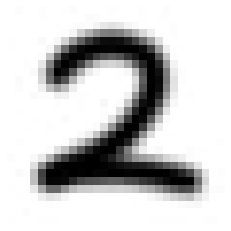

In [70]:
# test model on image not in dataset

def rgb2gray(rgb):  # function for converting to grayscale
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

# feed and plot image
imgfile = 'number_28x28.jpg'
im = mpimg.imread(imgfile)
im = rgb2gray(im)
im = im/255
im=(784-im*784).astype(int)
plt.imshow(im, cmap = plt.cm.gray_r)
plt.axis('off')
plt.show()

In [69]:
im = im.reshape(1,-1)
guess = knn.predict(im)

print('The predicated number of the image [' + str(imgfile) + "] is " + str(guess) + ".")

The predicated number of the image [number_28x28.jpg] is ['2'].
